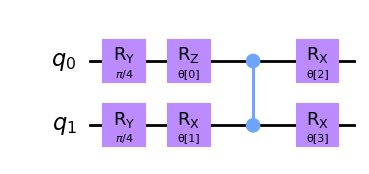

In [5]:
import numpy as np
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import PauliTwoDesign
from qiskit.opflow import Z, StateFn
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp

ansatz = PauliTwoDesign(2, reps=1, seed=2)
display(ansatz.decompose().draw('mpl'))
observable = Z ^ Z
observable2 = SparsePauliOp(['ZZ'])
initial_point = np.random.random(ansatz.num_parameters)

def loss(x):
    bound = ansatz.bind_parameters(x)
    return np.real((StateFn(observable, is_measurement=True) @ StateFn(bound)).eval())

def loss2(x):
    bound = ansatz.bind_parameters(x)
    estimator = Estimator()
    job = estimator.run(circuits=bound,observables=observable2)
    result = job.result()
    return result.values[0]


In [18]:
initial_point

array([0.52589483, 0.61834127, 0.31994372, 0.9309572 ])

In [7]:
spsa = SPSA(maxiter=300)
result1 = spsa.minimize(fun=loss2,x0=initial_point)
print(result1.x)
# result2 = spsa.optimize(ansatz.num_parameters, loss, initial_point=initial_point)
# two_spsa2 = SPSA(maxiter=300, second_order=True)
# result3 = two_spsa2.optimize(ansatz.num_parameters, loss, initial_point=initial_point)

[ 0.71835935  1.98471085 -0.70998519  1.01626894]


In [17]:
print(f'first optimizer outcome:{result1.x}\nsecond optimizer outcome:{result2[0]}\n \
    third optimizer outcome:{result3[0]}')

first optimizer outcome:[-0.56766772  1.26036993 -0.67414114  1.99515681]
second optimizer outcome:[-0.59966684  1.23774584 -0.68087141  2.02236071]
     third optimizer outcome:[ 6.47069168  1.66438136  2.51912471 10.86241632]


In [14]:
result3[0]

array([ 6.47069168,  1.66438136,  2.51912471, 10.86241632])